<a href="https://colab.research.google.com/github/valiantDI/statistical-hypothesis-testing/blob/main/statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import kolmogi
from scipy.stats import chi2
from scipy.stats import gamma
from scipy.optimize import minimize
from statsmodels.distributions.empirical_distribution import ECDF

Выборочные данные.

In [ ]:
sample_df = pd.read_table('/content/sample_11.txt', sep='\s+', header=None)
sample_arr = sample_df.values.flatten()
sample_df = pd.DataFrame(sample_arr)
sample_arr

FileNotFoundError: ignored

## 1) Нахождение выборочных характеристик исследуемой случайной величины. 

In [ ]:
def sample_characteristics(sample_array, sample_DataFrame):
  mean = sample_array.mean() # .mean - среднее значение в массиве
  var = sample_arr.var(ddof=0) # .var - выборочная дисперсия
  std = sample_arr.std(ddof=0) # .std - выборочное стандартное отклонение
  skew = sample_df[0].skew() # .skew - коэффициент асимметрии
  kurt = sample_df[0].kurt() # .kurt - коэффициент эксцесса
  return print(f'Выборочное среднее: {mean}' '\n' 
               f'Выборочная дисперсия: {var}' '\n' 
               f'Выборочное стандартное отклонение: {std}' '\n' 
               f'Выборочный коэффициент асимметрии: {skew}' '\n' 
               f'Выборочный коэффициент эксцесса: {kurt}')
  
sample_characteristics(sample_arr, sample_df)

Выборочное среднее: 2.669456054166666
Выборочная дисперсия: 3.688183651745321
Выборочное стандартное отклонение: 1.9204644364698142
Выборочный коэффициент асимметрии: 1.5250631395598684
Выборочный коэффициент эксцесса: 2.4236097518386006


## 2) Построение эмперической функции распределения и нормированной гистограммы.

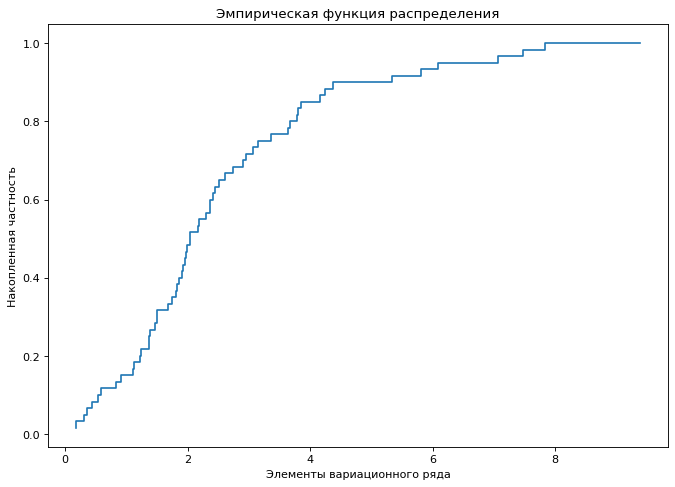

In [ ]:
variation_range = sorted(sample_arr) # Вариационный ряд
plt.figure(figsize=(10, 7), dpi=80)
plt.step(variation_range, ECDF(variation_range)(variation_range))
plt.xlabel('Элементы вариационного ряда')
plt.ylabel('Накопленная частность')
plt.title('Эмпирическая функция распределения')
plt.show()

1.2006956866666667

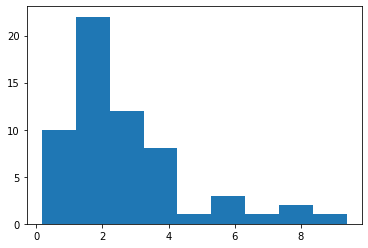

In [ ]:
hist = plt.hist(sample_arr, bins=9)
hist[1][1]

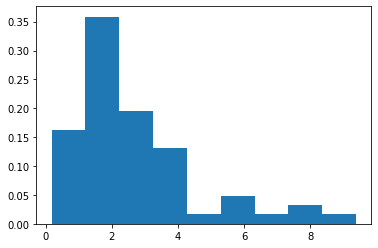

In [ ]:
density_hist = plt.hist(sample_arr, bins=9, density=True) # Плотность вероятности

## 3) Построение доверительной полосы по эмпирической функции распределения. Доверительная веоятность $\gamma$ гамма 0.95

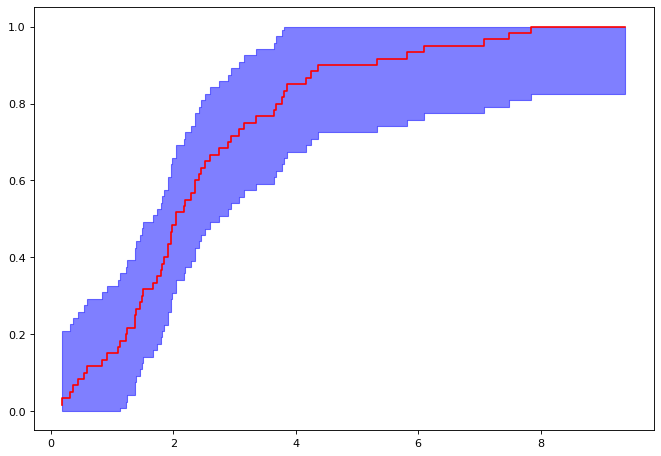

In [ ]:
proba = ECDF(variation_range)(variation_range) # Накопленная частность 
gamma = 0.95 # Доверительная вероятность
interval = kolmogi([1 - gamma]) / np.sqrt(len(sample_arr)) # Отклонение по Колмогорову
upper_limit = np.clip(proba + interval, 0, 1) # Верхняя граница
lower_limit = np.clip(proba - interval, 0, 1) # Нижняя граница

fig = plt.figure(figsize=(10, 7), dpi=80)
plt.step(variation_range, ECDF(variation_range)(variation_range), color='r')
plt.fill_between(variation_range, upper_limit, lower_limit, alpha=0.5, color='b', step='pre')
plt.show()

## 4) Эмпирическая функция распределения имеет сходство с функцией распределения Хи - квадрат, которое является частным случаем гамма распределения и функцией гамма распределением.

In [ ]:
array = [[],
        [],
        [],
        [],
        []]
sample_arr.sort()
for i in sample_arr:
  if i <= hist[1][1]:
    array[0].append(i)
  elif i <= hist[1][2]:
    array[1].append(i)
  elif i <= hist[1][3]:
    array[2].append(i)
  elif i <= hist[1][4]:
    array[3].append(i)
  else:
    array[4].append(i)  
freqs_arr = []    
for i in range(len(array)):
  freqs_arr.append(len(array[i]))
intervals = [(hist[1][0], hist[1][1]), (hist[1][1], hist[1][2]), 
             (hist[1][2], hist[1][3]), (hist[1][3], hist[1][4]),
             (hist[1][4], hist[1][5])]

N = len(freqs_arr)

print(f'Число значений, попавших в интервалы: {freqs_arr}')
print(f'Число интервало: {N}')
intervals

Число значений, попавших в интервалы: [10, 22, 12, 8, 8]
Число интервало: 5


[(0.17806556, 1.2006956866666667),
 (1.2006956866666667, 2.223325813333333),
 (2.223325813333333, 3.2459559399999995),
 (3.2459559399999995, 4.268586066666667),
 (4.268586066666667, 5.291216193333334)]

## 5) Проверка гипотез о виде распределения на основе критерия хи-квадрат Фишера.

Гипотеза - распределение Хи - квадрат.

In [ ]:
def fisher_stat_chi2(theta, nu=freqs_arr):
  distr_gamma = chi2(df=theta[0])
  prob = []
  for i in intervals:
    prob.append(distr_gamma.cdf(i[1]) - distr_gamma.cdf(i[0]))
  prob = np.array(prob)
  prob = prob / np.sum(prob)  
  return np.sum((nu - prob * 60) ** 2 / (prob * 60))

In [ ]:
initial_approximation = np.array([1]) # Начальное приближение
best_optimum_nelder_mead = minimize(fisher_stat_chi2, x0 = initial_approximation, method='nelder-mead').x # Симплекс-метод Нелдера-Мида
r = best_optimum_nelder_mead.shape[0]
best_optimum_nelder_mead

array([3.5])

In [ ]:
initial_approximation = np.array([1]) 
best_optimum_trust_constr = minimize(fisher_stat_chi2, x0 = initial_approximation, method='trust-constr').x # алгоритм доверительной области Берда
r = best_optimum_trust_constr.shape[0]
best_optimum_trust_constr

array([3.50001158])

In [ ]:
initial_approximation = np.array([1]) 
best_optimum_BFGS = minimize(fisher_stat_chi2, x0 = initial_approximation, method='BFGS').x # Алгоритм Бройдена-Флетчера-Голдфарба-Шанно
r = best_optimum_BFGS.shape[0]
best_optimum_BFGS

array([3.50001163])

In [ ]:
a = fisher_stat_chi2(best_optimum_nelder_mead) 
b = fisher_stat_chi2(best_optimum_trust_constr)
c = fisher_stat_chi2(best_optimum_BFGS) 
print(f'Значение функции после оптимизации с помощью сиплекс-метода Нелдера-Мида: {a}' '\n'
      f'Значение функции после оптимизации с помощью алгоритма доверительной области Берда: {b}' '\n'
      f'Значение функции после оптимизации с помощью алгоритма Бройдена-Флетчера-Голдфарба-Шанно: {c}')
print(f'Минимальное значение функции Хи-квадрат: {min(a, b, c)}')

Значение функции после оптимизации с помощью сиплекс-метода Нелдера-Мида: 3.7709481713773805
Значение функции после оптимизации с помощью алгоритма доверительной области Берда: 3.7709481705739987
Значение функции после оптимизации с помощью алгоритма Бройдена-Флетчера-Голдфарба-Шанно: 3.7709481705740897
Минимальное значение функции Хи-квадрат: 3.7709481705739987


In [ ]:
fisher_stat_value = fisher_stat_chi2(best_optimum_trust_constr)
freedom_degree = N - r - 1
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, freedom_degree)

print(f'Значение параметров статистики: {best_optimum_trust_constr}') 
print(f'Полученное значение статистики для заданных параметров: {fisher_stat_value}') 
print(f'Критическое значение статистики: {critical_value}')
print(f'Число степеней свободы в хи-вадрат распределении: {freedom_degree}')
print('Результат проверки нулевой гипотезы:')
if fisher_stat_value > critical_value:
  print('Нулевая гипотеза отвергнута')
else:
  print('Нулевая гипотеза принята')  

Значение параметров статистики: [2.89515535]
Полученное значение статистики для заданных параметров: 7.731202266434829
Критическое значение статистики: 7.814727903251179
Число степеней свободы в хи-вадрат распределении: 3
Результат проверки нулевой гипотезы:
Нулевая гипотеза принята


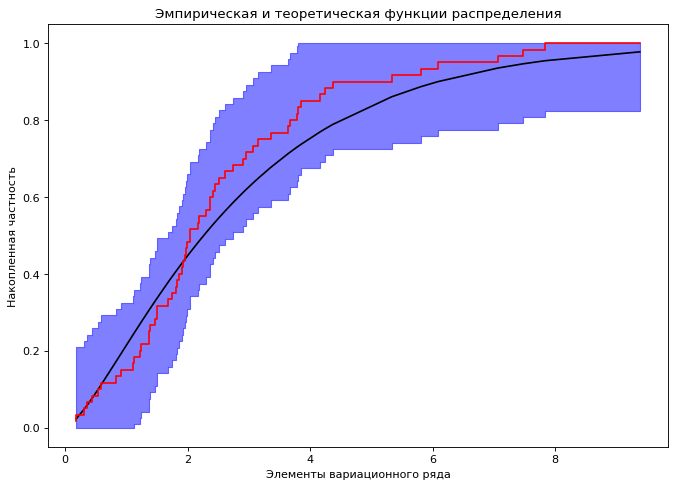

In [ ]:
fig = plt.figure(figsize=(10, 7), dpi=80)
plt.plot(variation_range, chi2(df=2.89515535).cdf(variation_range), color='black')
plt.step(variation_range, ECDF(variation_range)(variation_range), color='r')
plt.fill_between(variation_range, upper_limit, lower_limit, alpha=0.5, color='b', step='pre')
plt.xlabel('Элементы вариационного ряда')
plt.ylabel('Накопленная частность')
plt.title('Эмпирическая и теоретическая функции распределения')
plt.show()

Гипотеза - Гамма - распределение.

In [ ]:
def fisher_stat_gamma(theta, nu=freqs_arr):
  distr_gamma = gamma(a=theta[0], scale=theta[1])
  prob = []
  for i in intervals:
    prob.append(distr_gamma.cdf(i[1]) - distr_gamma.cdf(i[0]))
  prob = np.array(prob)
  prob = prob / np.sum(prob)  
  return np.sum((nu - prob * 60) ** 2 / (prob * 60))

In [ ]:
initial_approximation = np.array([1, 1]) # Начальное приближение
best_optimum_nelder_mead = minimize(fisher_stat_gamma, x0 = initial_approximation, method='nelder-mead').x # Симплекс-метод Нелдера-Мида
r = best_optimum_nelder_mead.shape[0]
best_optimum_nelder_mead

array([2.85024844, 0.88529017])

In [ ]:
initial_approximation = np.array([1, 1]) # Начальное приближение
best_optimum_trust_constr = minimize(fisher_stat_gamma, x0 = initial_approximation, method='trust-constr').x # алгоритм доверительной области Берда
r = best_optimum_trust_constr.shape[0]
best_optimum_trust_constr

array([2.8502233 , 0.88529676])

In [ ]:
a = fisher_stat_gamma(best_optimum_nelder_mead) 
b = fisher_stat_gamma(best_optimum_trust_constr)
print(f'Значение функции после оптимизации с помощью сиплекс-метода Нелдера-Мида: {a}' '\n'
      f'Значение функции после оптимизации с помощью алгоритма доверительной области Берда: {b}')
print(f'Минимальное значение функции Хи-квадрат: {min(a, b)}')

Значение функции после оптимизации с помощью сиплекс-метода Нелдера-Мида: 1.097238243835187
Значение функции после оптимизации с помощью алгоритма доверительной области Берда: 1.0972382421639042
Минимальное значение функции Хи-квадрат: 1.0972382421639042


In [ ]:
fisher_stat_value = fisher_stat_gamma(best_optimum_trust_constr)

print(f'Значение параметров статистики: {best_optimum_trust_constr}') 
print(f'Полученное значение статистики для заданных параметров: {fisher_stat_value}') 

freedom_degree = N - r - 1
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, freedom_degree) # Критическое значение статистики для уровня значимости:
print(f'Критическое значение статистики: {critical_value}')
print(f'Число степеней свободы в гамма распределении: {freedom_degree}')
print('Результат проверки нулевой гипотезы:')
if fisher_stat_value > critical_value:
  print('Нулевая гипотеза отвергнута')
else:
  print('Нулевая гипотеза принята')  

Значение параметров статистики: [2.8502233  0.88529676]
Полученное значение статистики для заданных параметров: 1.0972382421639042
Критическое значение статистики: 5.991464547107979
Число степеней свободы в гамма распределении: 2
Результат проверки нулевой гипотезы:
Нулевая гипотеза принята


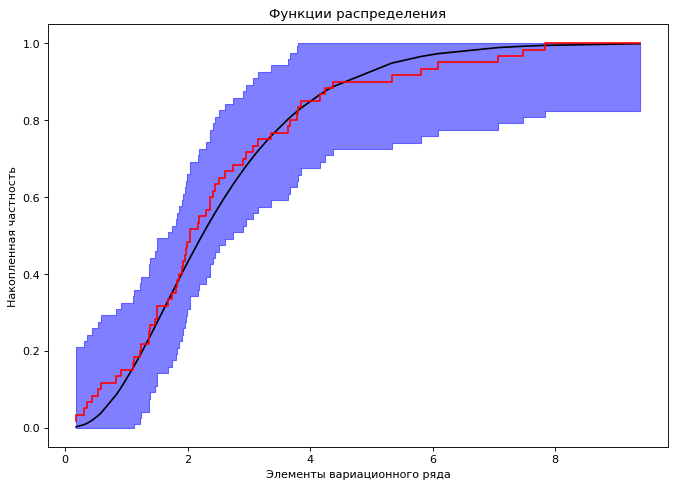

In [ ]:
fig = plt.figure(figsize=(10, 7), dpi=80)
plt.plot(variation_range, gamma(a=2.8502233, scale=0.88529676).cdf(variation_range), color='black')
plt.step(variation_range, ECDF(variation_range)(variation_range), color='r')
plt.fill_between(variation_range, upper_limit, lower_limit, alpha=0.5, color='b', step='pre')
plt.xlabel('Элементы вариационного ряда')
plt.ylabel('Накопленная частность')
plt.title('Функции распределения')
plt.show()

## 6) Нахождение максимально правдоподобных оценок параметров распределения случайной величены уже установленного вида.

In [ ]:
parametrs_chi2 = np.array(chi2.fit(variation_range, floc=0, fscale=1))
mle_df, mle_loc_chi2, mle_scale_chi2 = parametrs_chi2[0], parametrs_chi2[1], parametrs_chi2[2]
mle_df # ммп степень свободы

2.975390625000004

In [ ]:
parametrs_gamma = np.array(gamma.fit(variation_range, floc=0))
mle_alpha, mle_loc_gamma, mle_scale_gamma = parametrs_gamma[0], parametrs_gamma[1], parametrs_gamma[2]
mle_alpha, mle_scale_gamma # ммп параметры формы и масштаба


(2.0464481753401715, 1.304433743465278)

# 7) Построение функций распределения и плотности вероятностей от найденных максимально правдоподобных оценок.

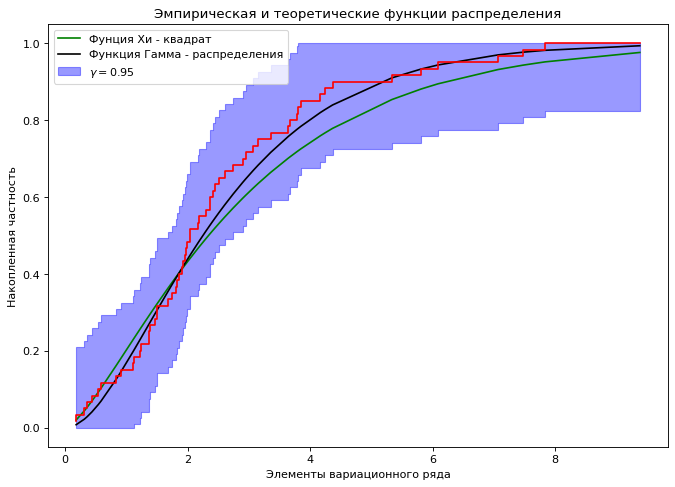

In [ ]:
fig = plt.figure(figsize=(10, 7), dpi=80)
plt.plot(variation_range, chi2(mle_df).cdf(variation_range), color='green', alpha=1, label='Фунция Хи - квадрат')
plt.plot(variation_range, gamma(a=mle_alpha, scale=mle_scale_gamma).cdf(variation_range), color='black', 
         label="Функция Гамма - распределения")
plt.step(variation_range, ECDF(variation_range)(variation_range), color='r')
plt.fill_between(variation_range, upper_limit, lower_limit, label='$\gamma=0.95$', color='b', step='pre', alpha=0.4)
plt.xlabel('Элементы вариационного ряда')
plt.ylabel('Накопленная частность')
plt.title('Эмпирическая и теоретические функции распределения')
plt.legend()
plt.show()

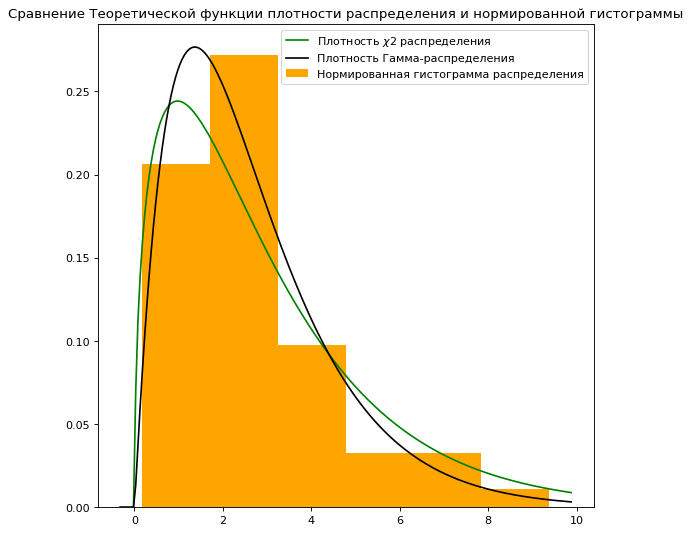

In [ ]:
plt.figure(figsize=(8,8), dpi=80)
x = np.arange(min(sample_arr)-0.5, max(sample_arr)+0.5, 0.05) 
plt.plot(x, chi2.pdf(x, df=mle_df, loc=mle_loc_chi2, scale=mle_scale_chi2), color='g', label='Плотность $\chi2$ распределения')
plt.plot(x, gamma.pdf(x, a=mle_alpha, loc=mle_loc_gamma, scale=mle_scale_gamma), color='black', label='Плотность Гамма-распределения')
plt.title('Сравнение Теоретической функции плотности распределения и нормированной гистограммы', fontsize = 12)
plt.hist(sample_arr, bins=6, density=True, label='Нормированная гистограмма распределения', color='orange')
plt.legend()